# Title: Project 7: Apply Supervised Machine Learning - Simple Linear Regression

## Project Introduction
**Author:** Topaz Montague

**Project Repository Link:** [datafun-07-applied](https://github.com/tfmontague/datafun-07-applied)

## Import Dependencies

In [47]:
import matplotlib
from matplotlib import pyplot as plt
import pandas
import pyarrow
import scipy
from scipy import stats
import seaborn as sns

## Part 1 - Chart a Straight Line

### Linear Relationships
Given a Fahrenheit temperature, we can calculate the corresponding Celsius temperature using the following formula:
c = 5 / 9 * (f - 32)
In this formula, f (the Fahrenheit temperature) is the independent variable, and c (the Celsius temperature) is the dependent variable—each value of c depends on the value of f used in the calculation.

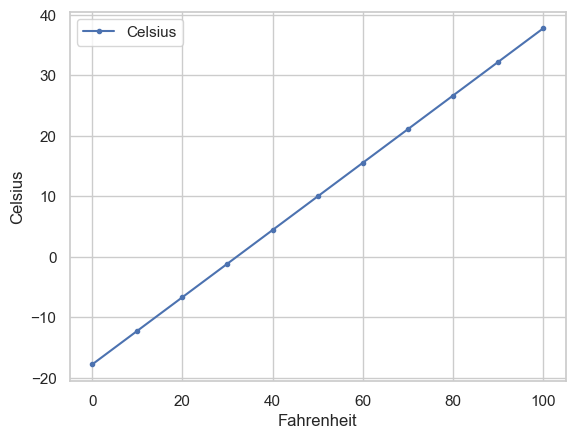

In [48]:
# Creating a lambda for our Celsius formula
c = lambda f: 5 / 9 * (f - 32)

# Storing each Fahrenheit/Celsius pair as a tuple in temps
temps = [(f, c(f)) for f in range(0, 101, 10)]

#place the data in a DataFrame, then use its plot method to display the linear relationship between the Fahrenheit and Celsius temperatures
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


## Part 2 - Predict Avg High Temp in NYC in January

 ### Section 1 - Data Acquisition
 Load NY City January high temperature from a csv file into a DataFrame

In [49]:
#loading and displaying the New York City data from ave_hi_nyc_jan_1895-2018.csv
nyc = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2 - Data Inspection
Review DataFrame’s head and tail to get a sense of the data

In [50]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [51]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning
Seaborn will be used to graph the Date-Value pairs and regression line. We will rename the 'Value' column as 'Temperature for better readability.

In [52]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


Seaborn labels the tick marks on the x-axis with Date values. Since this example processes
only January temperatures, the x-axis labels will be more readable if they do not contain
01 (for January), we’ll remove it from each Date. First, let’s check the column’s type:

In [53]:
nyc.Date.dtype

dtype('int64')

Since values are integers (int64), so we can divide by 100 to truncate the last two digits.

In [54]:
# Calling Series method floordiv performs integer division on every element of the Series
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics
Perform quick statistics on the dataset’s temperatures

In [55]:
# Setting precision to 2 decimal places
pd.set_option('display.precision', 2)
# Calling describe to calculate basic descriptive statistics
nyc['Temperature'].describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model
We will use the SciPy (Scientific Python) library stats module to provide function linregress, which calculates a regression line’s slope and intercept for a given set of data points to build the model for forecasting Future January Average High Temperatures

In [56]:
# Calculating regression line's slope and intercept
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
# Linear Regression Slope
linear_regression.slope

0.014771361132966163

In [57]:
# Linear Regression Intercept
linear_regression.intercept

8.694993233674289

Use these values with the simple linear regression equation for a straight line, y = mx + b, to predict the average January temperature in New York City for a given year for January of 2019. In the following calculation, linear_regression.slope is m, 2019 is x (the date value for which we would like to predict the temperature), and linear_regression.intercept is b:

### Section 6 - Predict
Use our model to forecast the future January average high temperature for 2024

In [58]:
# Predicting January 2024's average temperature
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

In [59]:
# Approximating January 1890 average tempature
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

### Section 7 - Visualizations
Use Seaborn's regplot function to generate a scatter plot with a best fit line plot, of each data point with the dates on the x-axis and the temperatures on the y-axis.

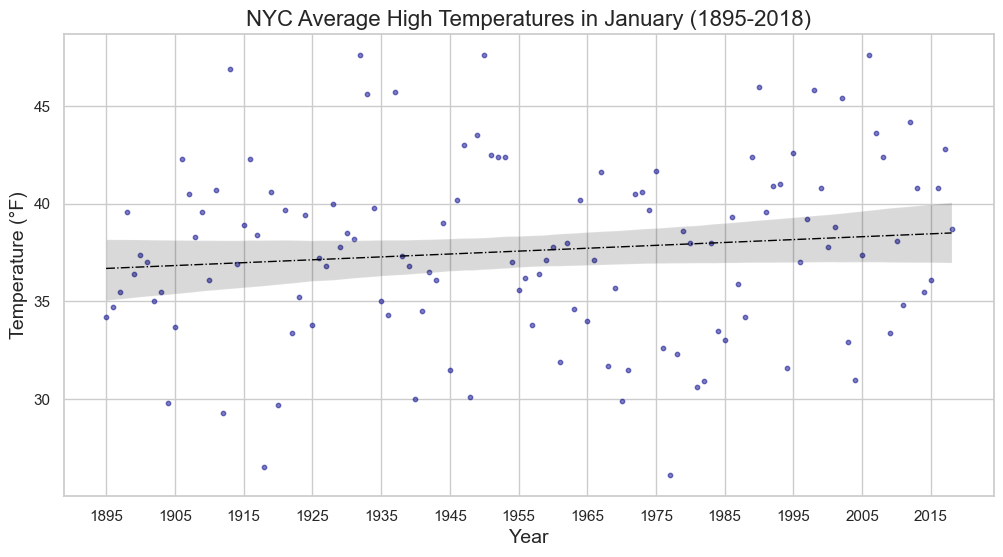

In [60]:
# Increase the size of the plot
plt.figure(figsize=(12, 6))

# Customize the scatter plot with a Seaborn theme, marker style, and regression line style
sns.set_theme(style='whitegrid')
axes = sns.regplot(x='Date', y='Temperature', data=nyc,
                   scatter_kws={"color": "darkblue", "alpha": 0.5, "s": 10},
                   line_kws={"color": "black", "lw": 1, "ls": "-."})

# Add title and labels to the plot
axes.set_title('NYC Average High Temperatures in January (1895-2018)', fontsize=16)
axes.set_xlabel('Year', fontsize=14)
axes.set_ylabel('Temperature (°F)', fontsize=14)

# Customize ticks
axes.set_xticks(range(min(nyc.Date), max(nyc.Date), 10))  # Adjust the range and interval as needed

# Display the plot
plt.show()


Observation:

The regression line’s slope (lower at the left and higher at the right) indicates a warming trend over the last 124 years.